In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G
from astropy.constants import c

from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker


plt.rcParams["figure.figsize"] = [4.5,3]
plt.rcParams["figure.dpi"] = 300
plt.rc('font', size=10)

In [2]:
def rho_gas(r,gam):

    r_b = 5.77e-4 * u.pc 
    n_b = 1.87e9 * (u.cm)**(-3)
    n = n_b * (r/r_b)**(-gam)
    m_p = 1.67e-27 * u.g

    return (m_p * n).to(u.Msun/(u.pc)**3)

In [3]:
def rho_dm(r,gam):

    r_1 = 0.01 * u.pc 
    rho_1 = 1.0823186e8 * u.Msun/(u.pc)**3
    rho = rho_1 * (r/r_1)**(-gam)

    return (rho).to(u.Msun/(u.pc)**3)

In [4]:
def rhos(gam,m):
     
    r_a = 9.4e-3 
    r0 = 5.77e-4 
    rs = 0.01 
    gam = np.asarray(gam)
    
    gam = np.asarray(gam)
    rs_gam = rs**gam

    condition = gam == 3
    log_term = np.log(r_a / r0)

    term3 = 4 * np.pi * rs_gam * log_term

    exponent = 3 - gam
    r_a_term = r_a**exponent - r0**exponent
    term_other = (4 * np.pi * rs_gam / (3 - gam)) * r_a_term
  
    factor = np.where(condition, term3, term_other)

    
    return (m / factor)* u.Msun / u.pc**3

In [6]:
gamarray = np.linspace(0,4,100)

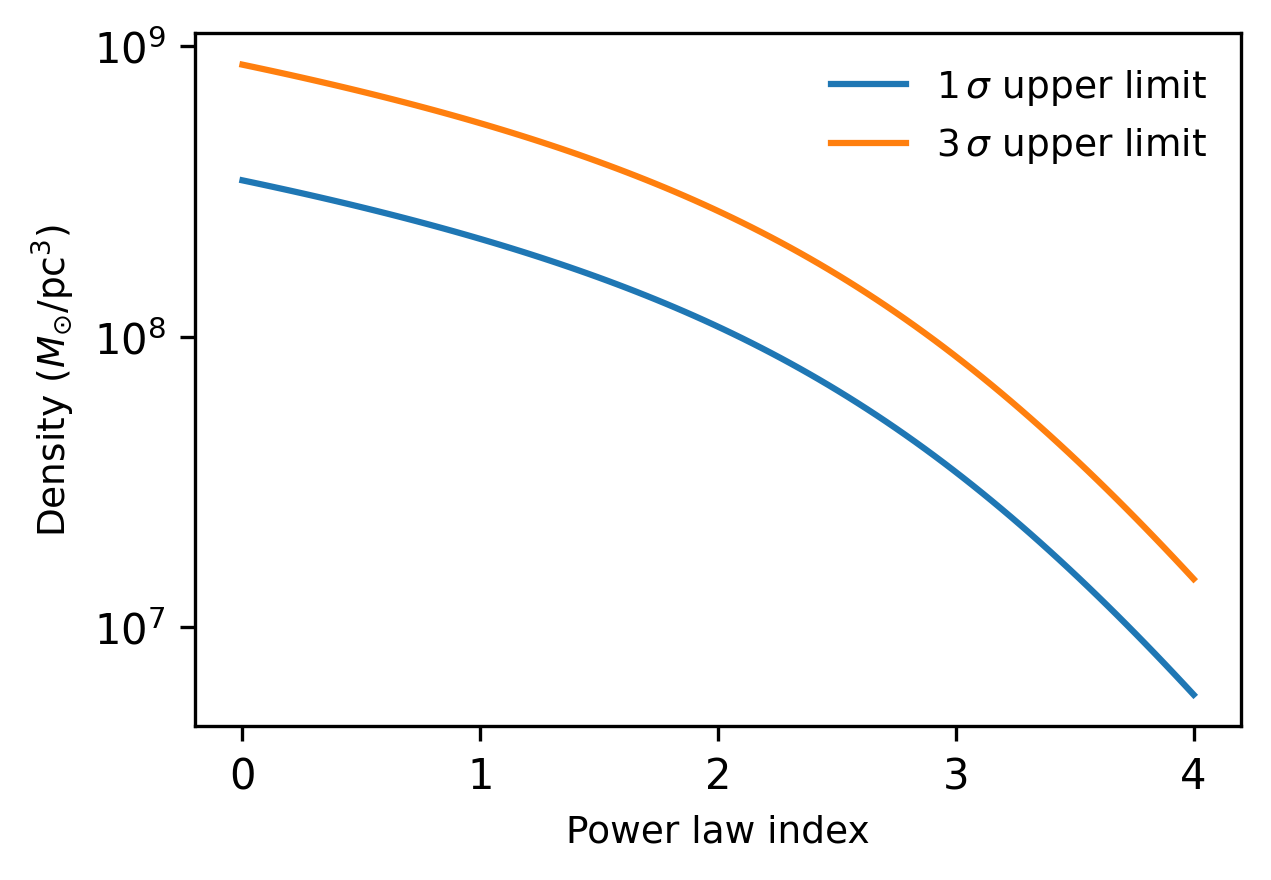

In [7]:
fig,ax = plt.subplots()
ax.plot(gamarray,rhos(gamarray,1200),label = r"$1\,\sigma$ upper limit")
ax.plot(gamarray,rhos(gamarray,3000),label = r"$3\,\sigma$ upper limit")
ax.set_yscale('log')

ax.set_xlabel(r'Power law index', fontsize = 9)
ax.set_ylabel(r'Density ($M_{\odot}/\rm{pc}^{3}$)', fontsize = 9)

ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.legend(frameon=False,fontsize=9)


In [8]:
r = np.logspace(-6,0,1000) * u.pc

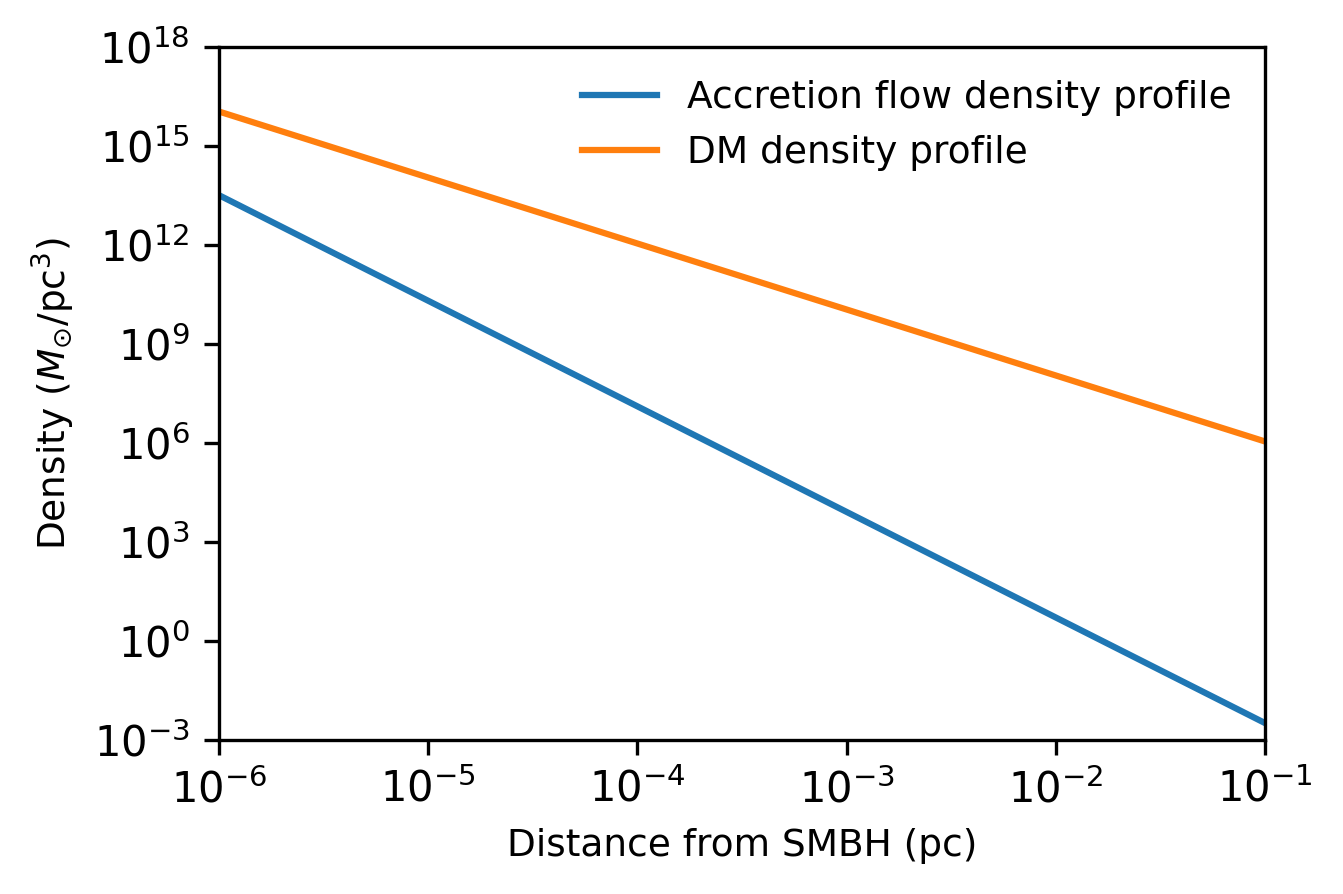

In [10]:
fig,ax = plt.subplots()

ax.plot(r,rho_gas(r,3.2),label = r"Accretion flow density profile")
ax.plot(r,rho_dm(r,2), label = r"DM density profile")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-6,1e-1)
ax.set_ylim(1e-3,1e18)

ax.set_xlabel(r'Distance from SMBH (pc)', fontsize = 9)
ax.set_ylabel(r'Density ($M_{\odot}/\rm{pc}^{3}$)', fontsize = 9)

ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.legend(frameon=False,fontsize=9)

plt.savefig('D:/pyfile/25DMEMRIs/output/density_profile.pdf', bbox_inches='tight')
plt.show()